In [52]:
import sys
sys.path.append('../src')
from numpy import *
from numpy import random
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,mark_inset)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from Params import *
from NeutrinoFuncs import *
from WIMPFuncs import *
from PlotFuncs import *
from LabFuncs import *
import cmocean

Nuc = Xe131

ymin=4e-50
ymax=1e-48
xmax = 1e5
    
if Nuc.Name=='Xe':
    cornertext = 'Xenon'
    xmin =1e1
    E_min = 6.0
    E_max = 200.0
elif Nuc.Name=='Ar':
    cornertext = 'Argon'
    xmin = 1e2
    E_min = 20.0
    E_max = 400.0
    

#==============================================================================#
f_AtmNu = 0.25
lim6 = loadtxt(mylimit_dir+'DL1D_'+Nuc.Name+'_CR_Stationary_HT'+'.txt')
lim5 = loadtxt(mylimit_dir+'DL1D_'+Nuc.Name+'_CR_CygnusTracking_100pc'+'.txt')
lim4 = loadtxt(mylimit_dir+'DL1D_'+Nuc.Name+'_CR_Stationary_100pc'+'.txt')
lim3 = loadtxt(mylimit_dir+'DL1D_'+Nuc.Name+'_CR_Stationary_75pc'+'.txt')
lim2 = loadtxt(mylimit_dir+'DL1D_'+Nuc.Name+'_CR_Stationary_50pc'+'.txt')
lim1 = loadtxt(mylimit_dir+'DL1D_'+Nuc.Name+'_Nondirectional'+'.txt')

f_AtmNu = 0.1
lim6_1 = loadtxt(mylimit_dir+'DL1D_'+Nuc.Name+'_CR_Stationary_HT_lowdPhiAtm'+'.txt')
lim5_1 = loadtxt(mylimit_dir+'DL1D_'+Nuc.Name+'_CR_CygnusTracking_100pc_lowdPhiAtm'+'.txt')
lim4_1 = loadtxt(mylimit_dir+'DL1D_'+Nuc.Name+'_CR_Stationary_100pc_lowdPhiAtm'+'.txt')
lim3_1 = loadtxt(mylimit_dir+'DL1D_'+Nuc.Name+'_CR_Stationary_75pc_lowdPhiAtm'+'.txt')
lim2_1 = loadtxt(mylimit_dir+'DL1D_'+Nuc.Name+'_CR_Stationary_50pc_lowdPhiAtm'+'.txt')
lim1_1 = loadtxt(mylimit_dir+'DL1D_'+Nuc.Name+'_Nondirectional_lowdPhiAtm'+'.txt')

R_Atm = R_AtmNu(E_min,E_max,Nuc=Nuc,eff_on=True)

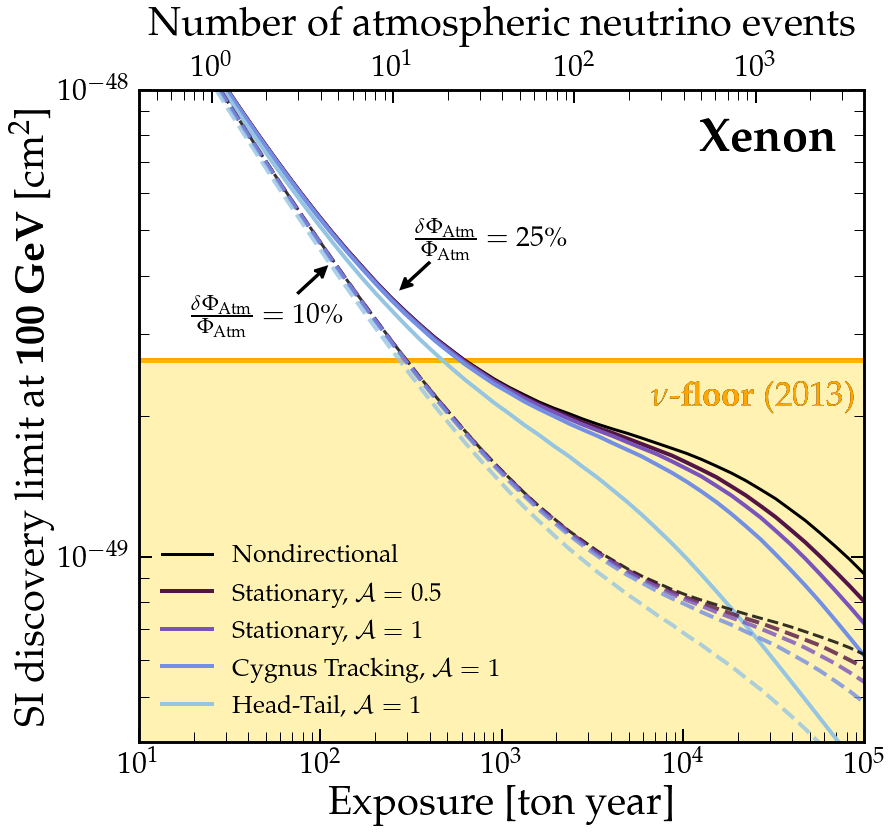

In [54]:
from PlotFuncs import *
import cmocean

def LimitPlot_VS_Exposure(m,NuFloor2013=True,\
                      xmin=1.0e1,xmax=1.0e5,\
                     ymin=1e-50,ymax=1e-48,\
                     cornertext='Argon',lfs=40):
    
    fig,ax = MySquarePlot(tfs=30)
    # NuFloor
    if NuFloor2013:
        colnu = 'gold'
        dat = loadtxt("../data/WIMPLimits/SI/NuFloor-Billard2013.txt",delimiter='\t')
        i_m = argmin(abs(dat[:,0]-m))
        x = [1e-1,1e8]
        y = [dat[i_m,1],dat[i_m,1]]
        plt.fill_between(x, y,lw=0.1,edgecolor=colnu,y2=1.0e-52,facecolor=colnu,alpha=0.3)
        plt.plot(x,y,'-',color='orange',lw=5,zorder=0)

    plt.ylim([ymin,ymax])
    plt.xlim([xmin,xmax])
    plt.xscale('log')
    plt.yscale('log')
    
    plt.gcf().text(0.87,0.81,r'{\bf '+cornertext+'}',fontsize=47,color='k',alpha=1.0,horizontalalignment='right')


    
    plt.xlabel(r'Exposure [ton year]',fontsize=lfs)
    plt.ylabel(r'SI discovery limit at {\bf '+str(int(m))+' GeV} [cm$^2$]',fontsize=lfs)
    
    ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=False,pad=10)
    ax.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=False)

    # Top axis
    ax2 = ax.twiny()  # instantiate a second axes that shares the same x-axis
    ax2.set_xlabel(r'Number of atmospheric neutrino events',fontsize=lfs,labelpad=20)  # we already handled the x-label with ax1
    ax2.set_xlim([xmin*R_Atm,xmax*R_Atm])
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=5)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax2.set_xscale('log')
    
    plt.sca(ax)
    
    return fig,ax

# def Lim1m(m1,inp):
#     lim1 = loadtxt(mylimit_dir+'DL2D_'+inp+'.txt')
#     Ex_vals = lim1[1:,0]
#     m_vals = lim1[0,1:]
#     i_m = argmin(abs(m_vals-m1))
#     sig = lim1[1:,1:]
#     sig[sig==0] = nan
#     sig1 = sig[:,i_m]
#     return Ex_vals,sig1


fig,ax = LimitPlot_VS_Exposure(m,cornertext=cornertext,ymin=ymin,ymax=ymax,xmin=xmin,xmax=xmax)

col = cmocean.cm.dense([0.2,0.4,0.6,0.8,0.9])
alpha = 0.8
plt.loglog(lim1[:,0],lim1[:,1],'k-',lw=3,label='Nondirectional')
plt.loglog(lim2[:,0],lim2[:,1],'-',color=col[4,:],lw=4,label=r'Stationary, $\mathcal{A}=0.5$')
#plt.loglog(lim3[:,0],lim3[:,1],'-',color=col[3,:],lw=4,label=r'Stationary, $\mathcal{A}=0.75$')
plt.loglog(lim4[:,0],lim4[:,1],'-',color=col[2,:],lw=4,label=r'Stationary, $\mathcal{A}=1$')
plt.loglog(lim5[:,0],lim5[:,1],'-',color=col[1,:],lw=4,label=r'Cygnus Tracking, $\mathcal{A}=1$')
plt.loglog(lim6[:,0],lim6[:,1],'-',color=col[0,:],lw=4,label=r'Head-Tail, $\mathcal{A}=1$')

plt.loglog(lim1_1[:,0],lim1_1[:,1],'k--',lw=3,alpha=alpha)
plt.loglog(lim2_1[:,0],lim2_1[:,1],'--',color=col[4,:],lw=4,alpha=alpha)
#plt.loglog(lim3_1[:,0],lim3_1[:,1],'--',color=col[3,:],lw=4,alpha=alpha)
plt.loglog(lim4_1[:,0],lim4_1[:,1],'--',color=col[2,:],lw=4,alpha=alpha)
plt.loglog(lim5_1[:,0],lim5_1[:,1],'--',color=col[1,:],lw=4,alpha=alpha)
plt.loglog(lim6_1[:,0],lim6_1[:,1],'--',color=col[0,:],lw=4,alpha=alpha)




if Nuc.Name=='Xe':
    plt.text(xmax*0.9,2.1e-49,r'$\nu$-{\bf floor} (2013)' ,fontsize=35,color='k',horizontalalignment='right')
    plt.text(xmax*0.9,2.1e-49,r'$\nu$-{\bf floor} (2013)',fontsize=35,color='orange',horizontalalignment='right')

    plt.arrow(0.435, 0.68, -0.03, -0.03, transform=fig.transFigure,figure=fig,
          length_includes_head=True,lw=2.5,
          head_width=0.012, head_length=0.012, overhang=0.2,
          edgecolor='k',facecolor='k',clip_on=False)
    plt.gcf().text(0.42,0.7,r'$\frac{\delta \Phi_{\rm Atm}}{\Phi_{\rm Atm}} = 25\%$',color='k',fontsize=28,verticalalignment='center')

    plt.arrow(0.295, 0.645, 0.03, 0.03, transform=fig.transFigure,figure=fig,
          length_includes_head=True,lw=2.5,
          head_width=0.012, head_length=0.012, overhang=0.2,
          edgecolor='k',facecolor='k',clip_on=False)
    plt.gcf().text(0.18,0.61,r'$\frac{\delta \Phi_{\rm Atm}}{\Phi_{\rm Atm}} = 10\%$',color='k',fontsize=28,verticalalignment='center')
elif Nuc.Name=='Ar':
    plt.text(xmin*1.2,2.1e-49,r'$\nu$-{\bf floor} (2013)' ,fontsize=35,color='k',horizontalalignment='left')
    plt.text(xmin*1.2,2.1e-49,r'$\nu$-{\bf floor} (2013)',fontsize=35,color='orange',horizontalalignment='left')

    plt.arrow(0.66, 0.68, -0.03, -0.03, transform=fig.transFigure,figure=fig,
          length_includes_head=True,lw=2.5,
          head_width=0.012, head_length=0.012, overhang=0.2,
          edgecolor='k',facecolor='k',clip_on=False)
    plt.gcf().text(0.65,0.7,r'$\frac{\delta \Phi_{\rm Atm}}{\Phi_{\rm Atm}} = 25\%$',color='k',fontsize=28,verticalalignment='center')

    plt.arrow(0.45, 0.645, 0.03, 0.03, transform=fig.transFigure,figure=fig,
          length_includes_head=True,lw=2.5,
          head_width=0.012, head_length=0.012, overhang=0.2,
          edgecolor='k',facecolor='k',clip_on=False)
    plt.gcf().text(0.39,0.61,r'$\frac{\delta \Phi_{\rm Atm}}{\Phi_{\rm Atm}} = 10\%$',color='k',fontsize=28,verticalalignment='center')
    
plt.legend(frameon=False,loc='lower left',fontsize=25)
plt.show()    
MySaveFig(fig,'DL_VS_Exposure_CR_'+Nuc.Name)


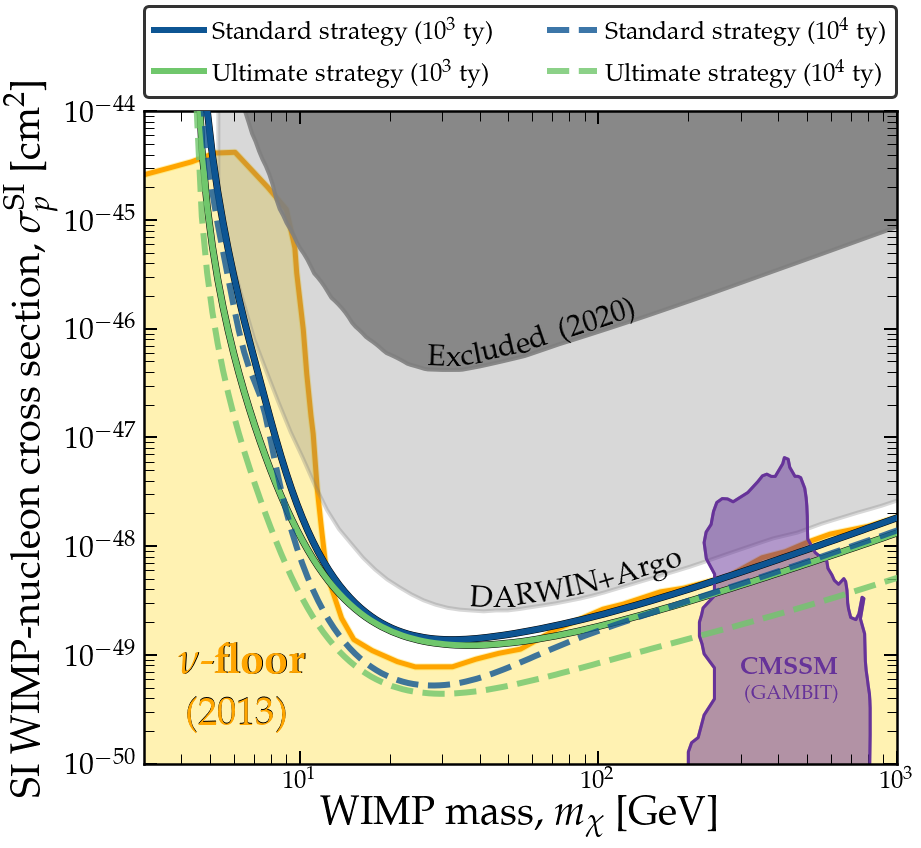

In [7]:
#==============================================================================#
lim2 = loadtxt(mylimit_dir+'DL2D_Xe_Nondirectional'+'.txt')
lim1_1 = loadtxt(mylimit_dir+'DL2D_XeAr_CR_lowdPhiAtm'+'.txt')

lim1[lim1==0] = nan
lim2[lim2==0] = nan
lim1_1[lim1_1==0] = nan
#==============================================================================#




from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cmocean
from scipy.ndimage.filters import gaussian_filter1d

def LimitPlot_VS_Mass(AllLimits=True,FutureLimits=True,DarkSide=False,Argo=False,\
                      LZ=False,DARWIN=False,\
                      NuFloor2013=False,\
                      xmin=3.0,xmax=1.0e3,\
                     ymin=1e-50,ymax=1e-44):

    fig,ax = MySquarePlot(r"WIMP mass, $m_\chi$ [GeV]",
                          r"SI WIMP-nucleon cross section, $\sigma^{\rm SI}_p$ [cm$^2$]",
                         lfs=40,size_x=13.5)


    if AllLimits:
        dat = loadtxt("../data/WIMPLimits/SI/AllLimits-2018.txt")
        plt.fill_between(dat[:,0], dat[:,1],lw=4,edgecolor='gray',y2=1.0e-30,facecolor='gray',alpha=0.9)
        #plt.plot(dat[:,0], dat[:,1],'k-',lw=6,zorder=10)
        #plt.plot(dat[:,0], dat[:,1],'-',color='gray',lw=3,zorder=10)
        #plt.gcf().text(0.572,0.721,r'{\bf Excluded} (2020)',fontsize=50,color='lightgray')
        #plt.gcf().text(0.57,0.72,r'{\bf Excluded} (2020)',fontsize=50,color='k',alpha=0.8)
        text = CurvedText(x = dat[160:,0],y = dat[160:,1],text=r'Excluded (2020)',va = 'bottom',axes = ax,fontsize=30)

    if FutureLimits:
        dat = loadtxt("../data/WIMPLimits/SI/AllLimits-Future.txt")
        plt.fill_between(dat[:,0], dat[:,1],lw=4,edgecolor='gray',y2=1.0e-30,facecolor='gray',alpha=0.3)
        #plt.plot(dat[:,0], dat[:,1],'k-',lw=6,zorder=10)
        #plt.plot(dat[:,0], dat[:,1],'-',color='gray',lw=3,zorder=10)
        #plt.gcf().text(0.572,0.721,r'{\bf Excluded} (Future)',fontsize=50,color='lightgray',rotation=40)
        #plt.gcf().text(0.57,0.72,r'{\bf Excluded} (Future)',fontsize=50,color='k',alpha=0.8,rotation=40)
        text = CurvedText(x = dat[20:,0],y = dat[20:,1],text=r'DARWIN+Argo',va = 'bottom',axes = ax,fontsize=30,color='k',alpha=0.8)

        
    if DarkSide:
        coldarkside = 'mediumseagreen'
        dat = loadtxt("../data/WIMPLimits/SI/DarkSide-200ty.txt",delimiter=',')
        plt.plot(dat[:,0], dat[:,1],'-',color='k',lw=10,zorder=10)
        plt.plot(dat[:,0], dat[:,1],'-',color=coldarkside,lw=6,zorder=10)
        plt.gcf().text(0.8801,0.401,r'{\bf DarkSide-20k}',fontsize=30,color='k',rotation=24,horizontalalignment='right')
        plt.gcf().text(0.88,0.4,r'{\bf DarkSide-20k}',fontsize=30,color=coldarkside,rotation=24,horizontalalignment='right')

    if Argo:
        colargo = 'blueviolet'
        dat = loadtxt("../data/WIMPLimits/SI/Argo.txt",delimiter=',')
        plt.plot(dat[:,0], dat[:,1],'-',color='k',lw=10,zorder=10)
        plt.plot(dat[:,0], dat[:,1],'-',color=colargo,lw=6,zorder=10)
        plt.gcf().text(0.891,0.3601,r'{\bf Argo}',fontsize=34,color='k',rotation=22,horizontalalignment='right')
        plt.gcf().text(0.89,0.36,r'{\bf Argo}',fontsize=34,color=colargo,rotation=22,horizontalalignment='right')

    if LZ:
        dat = 10.0**loadtxt("../data/WIMPLimits/SI/LZ.txt",delimiter=',')
        plt.plot(dat[:,0], dat[:,1],'-',color='k',lw=10,zorder=10)
        plt.plot(dat[:,0], dat[:,1],'-',color='w',lw=6,zorder=10)
        plt.gcf().text(0.901,0.2741,r'{\bf LZ} [10 ton-year]',fontsize=34,color='k',rotation=22,horizontalalignment='right')
        plt.gcf().text(0.9,0.274,r'{\bf LZ} [10 ton-year]',fontsize=34,color='w',rotation=22,horizontalalignment='right')
    
    if DARWIN:
        dat = loadtxt("../data/WIMPLimits/SI/DARWIN.txt",delimiter=',')
        plt.plot(dat[:,0], dat[:,1],'-',color='k',lw=10,zorder=10)
        plt.plot(dat[:,0], dat[:,1],'-',color='w',lw=6,zorder=10)
        plt.gcf().text(0.901,0.1741,r'{\bf DARWIN} [200 ton-year]',fontsize=34,color='k',rotation=22,horizontalalignment='right')
        plt.gcf().text(0.9,0.174,r'{\bf DARWIN} [200 ton-year]',fontsize=34,color='w',rotation=22,horizontalalignment='right')

    plt.yscale('log')
    plt.xscale('log')
    plt.yticks(10.0**arange(-50,-30,1),fontsize=30)
    plt.ylim([ymin,ymax])
    plt.xlim([xmin,xmax])
    
    return fig,ax
    
def Lim1Ex(Ex1,inp):
    lim1 = loadtxt(mylimit_dir+'DL2D_'+inp+'.txt')
    Ex_vals = lim1[1:,0]
    m_vals = lim1[0,1:]
    i_ex = argmin(abs(Ex_vals-Ex1))
    sig = lim1[1:,1:]
    sig[sig==0] = nan
    sig1 = sig[i_ex,:]
    return m_vals,sig1

fig,ax = LimitPlot_VS_Mass(FutureLimits=True)

# Limits
alpha = 0.8
col1,col2 = cmocean.cm.haline(array([0.23,0.73]))

plt.loglog(lim2[0,1:],lim2[1,1:],'-',lw=7,color='k')
plt.loglog(lim2[0,1:],lim2[1,1:],'-',lw=6,color=col1,zorder=10,label=r'Standard strategy ($10^3$ ty)')

plt.loglog(lim1_1[0,1:],1.3*lim1_1[1,1:],'-',lw=7,color='k')
plt.loglog(lim1_1[0,1:],1.3*lim1_1[1,1:],'-',lw=6,color=col2,zorder=10,label=r'Ultimate strategy ($10^3$ ty)')

plt.loglog(lim2[0,1:],lim2[2,1:],'--',lw=6,color=col1,zorder=10,alpha=alpha,label=r'Standard strategy ($10^4$ ty)')
plt.loglog(lim1_1[0,1:],1.3*lim1_1[2,1:],'--',lw=6,color=col2,zorder=10,alpha=alpha,label=r'Ultimate strategy ($10^4$ ty)')


#plt.loglog(lim1[0,1:],lim1[2,1:],'-',lw=4,color='purple',zorder=10)
#plt.loglog(lim2[0,1:],lim2[2,1:],'-',lw=4,color='k',zorder=10)

#plt.loglog(lim1_1[0,1:],lim1_1[2,1:],'--',lw=4,color='purple',zorder=10,alpha=alpha)
#plt.loglog(lim2_1[0,1:],lim2_1[2,1:],'--',lw=4,color='k',zorder=10,alpha=alpha)

col_con = 'rebeccapurple'
CMSSM = loadtxt('../data/WIMPLimits/candidates/GAMBIT_CMSSM.txt')
plt.fill_between(CMSSM[:,0],CMSSM[:,1],color=col_con,alpha=0.5,lw=3)
plt.plot(CMSSM[:,0],CMSSM[:,1],color=col_con,alpha=1,lw=3)
plt.gcf().text(0.74,0.23,r'{\bf CMSSM}',color=col_con,fontsize=25,rotation=0)
plt.gcf().text(0.744,0.2,r'(GAMBIT)',color=col_con,fontsize=20,rotation=0)

colnu = 'gold'
dat = loadtxt("../data/WIMPLimits/SI/NuFloor-Billard2013.txt",delimiter='\t')
plt.fill_between(dat[:,0], dat[:,1],lw=7,edgecolor=colnu,y2=1.0e-52,facecolor=colnu,alpha=0.3,zorder=0)
plt.plot(dat[:,0], dat[:,1],lw=5,color='orange',alpha=1,zorder=0)

plt.gcf().text(0.161,0.2305,r'$\nu$-{\bf floor}' ,fontsize=43,color='k')
plt.gcf().text(0.16,0.23,r'$\nu$-{\bf floor}',fontsize=43,color='orange')
plt.gcf().text(0.17,0.171,r'(2013)' ,fontsize=39,color='k')
plt.gcf().text(0.17,0.17,r'(2013)',fontsize=39,color='orange')
      
leg = plt.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.015,1.18),ncol=2,handletextpad=0.3,columnspacing=2.17)
leg.get_frame().set_linewidth(3)
leg.get_frame().set_edgecolor('k')

#plt.gcf().text(0.49,0.6,'Excluded (2020)',color='k',fontsize=28,rotation=18.5)
#plt.gcf().text(0.49,0.308,'DARWIN+Argo',color='gray',fontsize=28,rotation=16)


plt.show()
MySaveFig(fig,'DL_VS_Mass_CR')

In [182]:
print(lim2[1,-1]/lim2[2,-1])
print(lim1_1[1,-1]/lim1_1[2,-1])
print(dat[-1,1]/lim1_1[2,-1])

1.3262146887378208
2.7711119682274044
5.323030527133696


In [4]:
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import text as mtext
import numpy as np
import math

class CurvedText(mtext.Text):
    """
    A text object that follows an arbitrary curve.
    """
    def __init__(self, x, y, text, axes, **kwargs):
        super(CurvedText, self).__init__(x[0],y[0],' ', **kwargs)

        axes.add_artist(self)

        ##saving the curve:
        self.__x = x
        self.__y = y
        self.__zorder = self.get_zorder()

        ##creating the text objects
        self.__Characters = []
        for c in text:
            if c == ' ':
                ##make this an invisible 'a':
                t = mtext.Text(0,0,'a')
                t.set_alpha(0.0)
            else:
                t = mtext.Text(0,0,c, **kwargs)

            #resetting unnecessary arguments
            t.set_ha('center')
            t.set_rotation(0)
            t.set_zorder(self.__zorder +1)

            self.__Characters.append((c,t))
            axes.add_artist(t)


    ##overloading some member functions, to assure correct functionality
    ##on update
    def set_zorder(self, zorder):
        super(CurvedText, self).set_zorder(zorder)
        self.__zorder = self.get_zorder()
        for c,t in self.__Characters:
            t.set_zorder(self.__zorder+1)

    def draw(self, renderer, *args, **kwargs):
        """
        Overload of the Text.draw() function. Do not do
        do any drawing, but update the positions and rotation
        angles of self.__Characters.
        """
        self.update_positions(renderer)

    def update_positions(self,renderer):
        """
        Update positions and rotations of the individual text elements.
        """

        #preparations

        ##determining the aspect ratio:
        ##from https://stackoverflow.com/a/42014041/2454357

        ##data limits
        xlim = self.axes.get_xlim()
        ylim = self.axes.get_ylim()
        ## Axis size on figure
        figW, figH = self.axes.get_figure().get_size_inches()
        ## Ratio of display units
        _, _, w, h = self.axes.get_position().bounds
        ##final aspect ratio
        aspect = ((figW * w)/(figH * h))*(ylim[1]-ylim[0])/(xlim[1]-xlim[0])

        #points of the curve in figure coordinates:
        x_fig,y_fig = (
            np.array(l) for l in zip(*self.axes.transData.transform([
            (i,j) for i,j in zip(self.__x,self.__y)
            ]))
        )

        #point distances in figure coordinates
        x_fig_dist = (x_fig[1:]-x_fig[:-1])
        y_fig_dist = (y_fig[1:]-y_fig[:-1])
        r_fig_dist = np.sqrt(x_fig_dist**2+y_fig_dist**2)

        #arc length in figure coordinates
        l_fig = np.insert(np.cumsum(r_fig_dist),0,0)

        #angles in figure coordinates
        rads = np.arctan2((y_fig[1:] - y_fig[:-1]),(x_fig[1:] - x_fig[:-1]))
        degs = np.rad2deg(rads)


        rel_pos = 10
        for c,t in self.__Characters:
            #finding the width of c:
            t.set_rotation(0)
            t.set_va('center')
            bbox1  = t.get_window_extent(renderer=renderer)
            w = bbox1.width
            h = bbox1.height

            #ignore all letters that don't fit:
            if rel_pos+w/2 > l_fig[-1]:
                t.set_alpha(0.0)
                rel_pos += w
                continue

            elif c != ' ':
                t.set_alpha(1.0)

            #finding the two data points between which the horizontal
            #center point of the character will be situated
            #left and right indices:
            il = np.where(rel_pos+w/2 >= l_fig)[0][-1]
            ir = np.where(rel_pos+w/2 <= l_fig)[0][0]

            #if we exactly hit a data point:
            if ir == il:
                ir += 1

            #how much of the letter width was needed to find il:
            used = l_fig[il]-rel_pos
            rel_pos = l_fig[il]

            #relative distance between il and ir where the center
            #of the character will be
            fraction = (w/2-used)/r_fig_dist[il]

            ##setting the character position in data coordinates:
            ##interpolate between the two points:
            x = self.__x[il]+fraction*(self.__x[ir]-self.__x[il])
            y = self.__y[il]+fraction*(self.__y[ir]-self.__y[il])

            #getting the offset when setting correct vertical alignment
            #in data coordinates
            t.set_va(self.get_va())
            bbox2  = t.get_window_extent(renderer=renderer)

            bbox1d = self.axes.transData.inverted().transform(bbox1)
            bbox2d = self.axes.transData.inverted().transform(bbox2)
            dr = np.array(bbox2d[0]-bbox1d[0])

            #the rotation/stretch matrix
            rad = rads[il]
            rot_mat = np.array([
                [math.cos(rad), math.sin(rad)*aspect],
                [-math.sin(rad)/aspect, math.cos(rad)]
            ])

            ##computing the offset vector of the rotated character
            drp = np.dot(dr,rot_mat)

            #setting final position and rotation:
            t.set_position(np.array([x,y])+drp)
            t.set_rotation(degs[il])

            t.set_va('center')
            t.set_ha('center')

            #updating rel_pos to right edge of character
            rel_pos += w-used


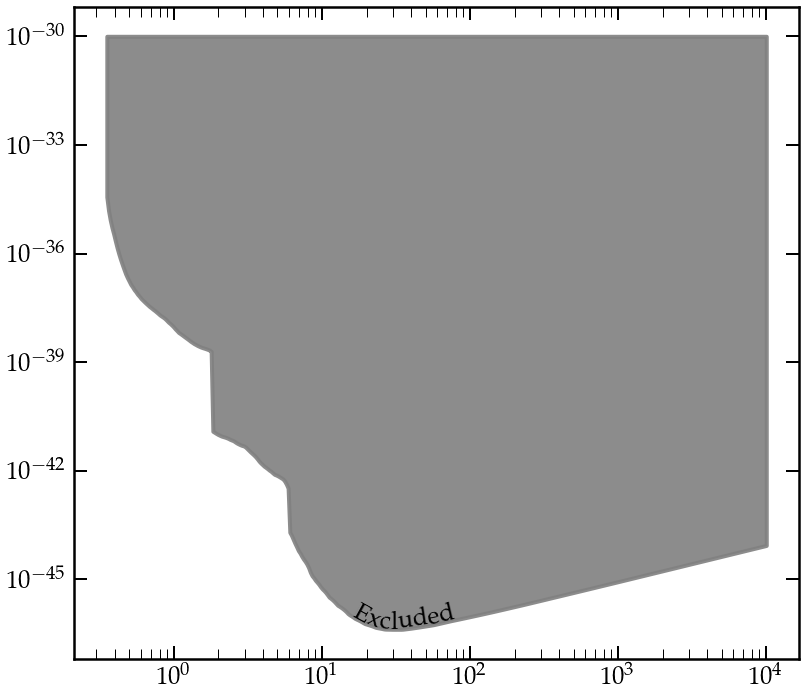

In [154]:
dat1 = loadtxt("../data/WIMPLimits/SI/DARWIN.txt",delimiter=',')
dat2 = loadtxt("../data/WIMPLimits/SI/Argo.txt",delimiter=',')


fig,ax = MySquarePlot()
dat = loadtxt("../data/WIMPLimits/SI/AllLimits-2018.txt")
plt.fill_between(dat[:,0], dat[:,1],lw=4,edgecolor='gray',y2=1.0e-30,facecolor='gray',alpha=0.9)
#plt.plot(dat[:,0], dat[:,1],'k-',lw=6,zorder=10)
#plt.plot(dat[:,0], dat[:,1],'-',color='gray',lw=3,zorder=10)
#plt.gcf().text(0.572,0.721,r'{\bf Excluded} (2020)',fontsize=50,color='lightgray')
#plt.gcf().text(0.57,0.72,r'{\bf Excluded} (2020)',fontsize=50,color='k',alpha=0.8)
text = CurvedText(x = dat[140:220,0],y = dat[140:220,1],text=r'Excluded',va = 'bottom',axes = ax)

plt.yscale('log')
plt.xscale('log')
plt.show()

(1e-50, 1e-45)

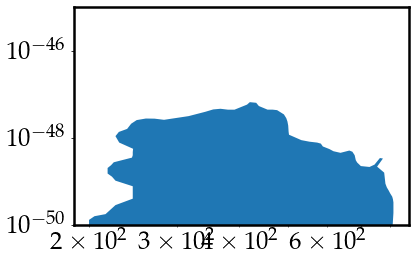

In [83]:
import alphashape

points = loadtxt('../data/WIMPLimits/candidates/GAMBIT_CMSSM.txt',delimiter=',')
alpha_shape = alphashape.alphashape(points, 100)
x, y = alpha_shape.exterior.coords.xy
x = asarray(x)*2500
y = 10.0**(asarray(y)*15-60)
plt.fill_between(x,y)

plt.yscale('log')
plt.xscale('log')
plt.ylim([1e-50,1e-45])

In [85]:
CMSSM = loadtxt('../data/WIMPLimits/candidates/GAMBIT_CMSSM_.txt')